# House Price Prediction

**Problem Background**

In today's real estate market, both potential homebuyers and property owners face significant challenges. Homebuyers seek to find their dream homes within their budget, while property owners aim to price their homes competitively to attract potential buyers. In this context, accurate and data-driven house price prediction can play a pivotal role in assisting both parties in achieving their goals.

**Evaluation Metrics**

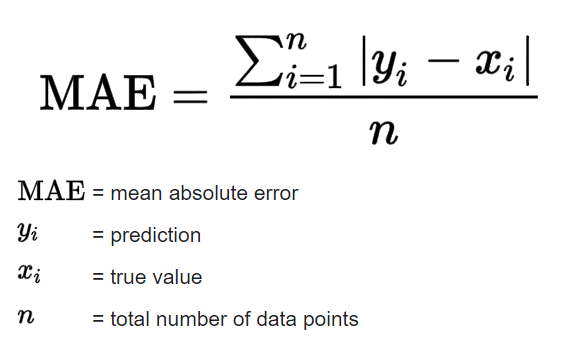

we have chosen MAE as our evaluation metric because it addresses the specific characteristics of our project. It is robust to outliers, aligns with the assumption of a linear and constant cost of errors, and offers clear interpretability. By focusing on MAE, we aim to provide a reliable and easily understandable measure of our model's accuracy in predicting house prices, ultimately assisting stakeholders in making informed real estate decisions.

## Data and Packages Loading

In [ ]:
!pip install pandas-profiling
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5d0c1a7acadc4616b540c156e2a6ab4bddd02199b513175e61757c05ae4eac2e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.3-py2.py3-none-any.wh

In [ ]:
# Data Analytics and Preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Machine Learning Models
import h2o
from h2o.automl import H2OAutoML

<ipython-input-2-67f887cd00f2>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Save and read the datasets directly from Google Drive so that manual upload is not required and prevent incomplete loading data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Analyst   Science/House Price dataset/House_Price_dataset.csv', encoding = 'windows-1252')

## Data Understanding



In this case, we using pandas-profiling to streamlines and enhances the initial stages of data exploration and understanding.

In [ ]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From overview, we can understand the data as follows:


*   There is no duplicated data
*   There are 88143 missing values (2.6% from all number observation)
*   There are 20 variables in dataset (8 categorical and 12 numerical variable type)




## Exploratory Data Analysis

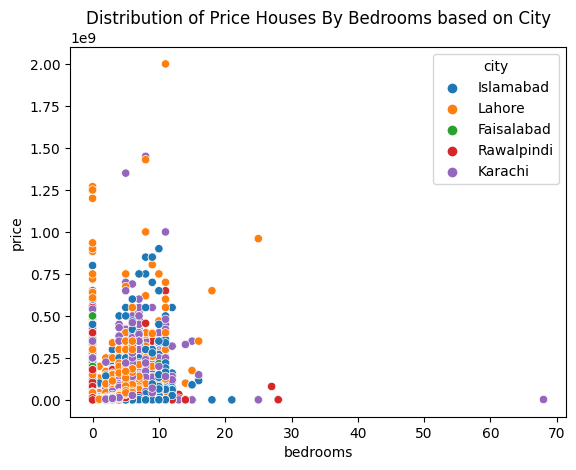

In [ ]:
plt.title('Distribution of Price Houses By Bedrooms based on City')
sns.scatterplot(df, x = 'bedrooms', y = 'price', hue = 'city')
plt.show()

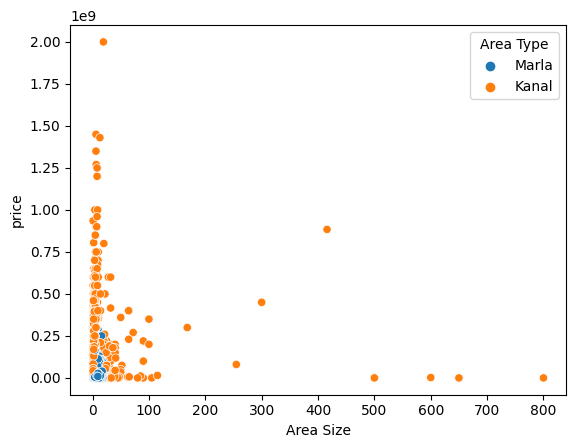

In [ ]:
sns.scatterplot(df, x = 'Area Size', y = 'price', hue = 'Area Type')
plt.show()

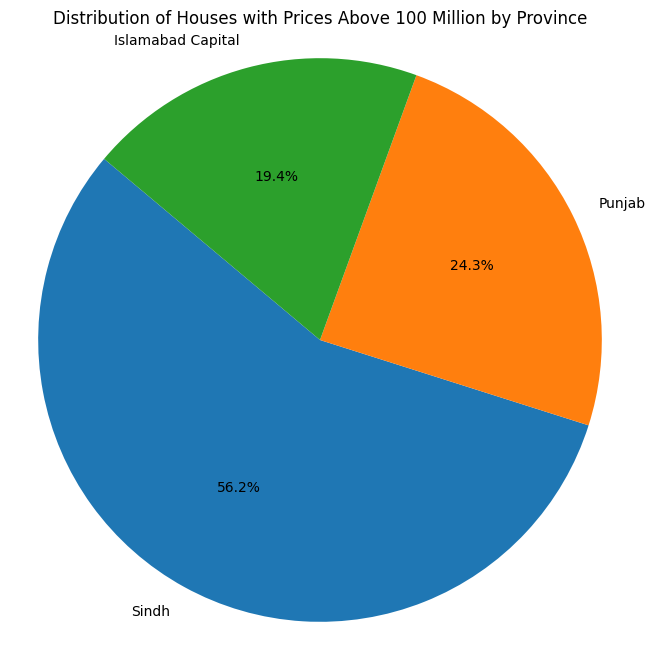

In [ ]:
high_price_df = df[df['price'] > 100000000]

province_counts = high_price_df['province_name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(province_counts, labels=province_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Houses with Prices Above 100 Million by Province')
plt.axis('equal')

plt.show()

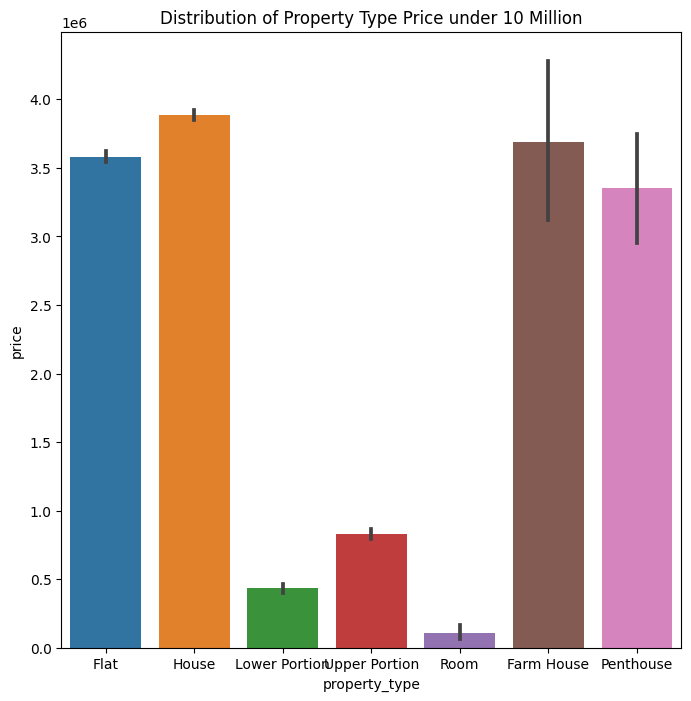

In [ ]:
low_price_df = df[df['price'] <= 10000000]

plt.figure(figsize=(8, 8))
plt.title('Distribution of Property Type Price under 10 Million')
sns.barplot(low_price_df, x = 'property_type', y = 'price')
plt.show()

In [ ]:
df.isna().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

# Data Preprocessing

### Handling Missing Value

In this case, we will fill the categorical missing value by creating new unique value that is `Others`

In [ ]:
def cat_fill(x):
  df[x].fillna('Others', inplace = True)

In [ ]:
def mean_fill(x):
  mean_variable = df[x].mean()
  df[x].fillna(mean_variable, inplace = True)

In [ ]:
cat_fill('agency')
df['agency'].isna().sum()

0

In [ ]:
cat_fill('agent')
df['agent'].isna().sum()

0

In [ ]:
cat_fill('Area Type')
df['Area Type'].isna().sum()

0

# Feature Engineering

### Label Encoder

First, we going to check the unique value of each categorical variable.

In [ ]:
df['property_type'].unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [ ]:
df['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [ ]:
df['Area Type'].unique()

array(['Marla', 'Kanal'], dtype=object)

In [ ]:
df['purpose'].unique()

array(['For Sale', 'For Rent'], dtype=object)

Then, we will use LabelEncoder by Scikit Learn to encode the unique value data. Because, label encoding is a valuable preprocessing technique for machine learning models, when dealing with ordinal data and when compatibility with algorithms that require numerical input is essential.

In [ ]:
le = LabelEncoder()

Property Type Label Encoder

In [ ]:
df['property_type'] = le.fit_transform(df['property_type'])
print(df['property_type'].unique())

[1 2 4 0 3 6 5]


In [ ]:
le.inverse_transform(df['property_type'].unique())

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

City Label Encoder

In [ ]:
df['city'] = le.fit_transform(df['city'])
df['city'].unique()

array([1, 3, 0, 4, 2])

In [ ]:
le.inverse_transform(df['city'].unique())

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

Purpose Label Encoder

In [ ]:
df['purpose'] = le.fit_transform(df['purpose'])
df['purpose'].unique()

array([1, 0])

In [ ]:
le.inverse_transform(df['purpose'].unique())

array(['For Sale', 'For Rent'], dtype=object)

Province Label Encoder

In [ ]:
df['province_name'] = le.fit_transform(df['province_name'])
df['province_name'].unique()

array([0, 1, 2])

In [ ]:
le.inverse_transform(df['province_name'].unique())

array(['Islamabad Capital', 'Punjab', 'Sindh'], dtype=object)

Area Type Label Encoder

In [ ]:
df['Area Type'] = le.fit_transform(df['Area Type'])
df['Area Type'].unique()

array([1, 0])

In [ ]:
le.inverse_transform(df['Area Type'].unique())

array(['Marla', 'Kanal'], dtype=object)

In [ ]:
df.head()

property_id  location_id  \
0       237062         3325   
1       346905         3236   
2       386513          764   
3       656161          340   
4       841645         3226   

                                            page_url  property_type     price  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...              1  10000000   
1  https://www.zameen.com/Property/e_11_2_service...              1   6900000   
2  https://www.zameen.com/Property/islamabad_g_15...              2  16500000   
3  https://www.zameen.com/Property/islamabad_bani...              2  43500000   
4  https://www.zameen.com/Property/dha_valley_dha...              2   7000000   

      location  city  province_name   latitude  longitude  baths       area  \
0         G-10     1              0  33.679890  73.012640      2    4 Marla   
1         E-11     1              0  33.700993  72.971492      3  5.6 Marla   
2         G-15     1              0  33.631486  72.926559      6    8 Marla   
3    Bani Gala     1              0  33.707573  73.151199      4    2 Kanal   
4  DHA Defence     1              0  33.492591  73.301339      3    8 Marla   

   purpose  bedrooms  date_added         agency  \
0        1         2  02-04-2019         Others   
1        1         3  05-04-2019         Others   
2        1         5  07-17-2019         Others   
3        1         4  04-05-2019         Others   
4        1         3  07-10-2019  Easy Property   

                                          agent  Area Type  Area Size  \
0                                        Others          1        4.0   
1                                        Others          1        5.6   
2                                        Others          1        8.0   
3                                        Others          0        2.0   
4  Muhammad Junaid Ceo Muhammad Shahid Director          1        8.0   

  Area Category  
0     0-5 Marla  
1    5-10 Marla  
2    5-10 Marla  
3     1-5 Kanal  
4    5-10 Marla

<ipython-input-32-c29575dcd288>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['price']).sort_values(ascending = False)
<ipython-input-32-c29575dcd288>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method = 'spearman')


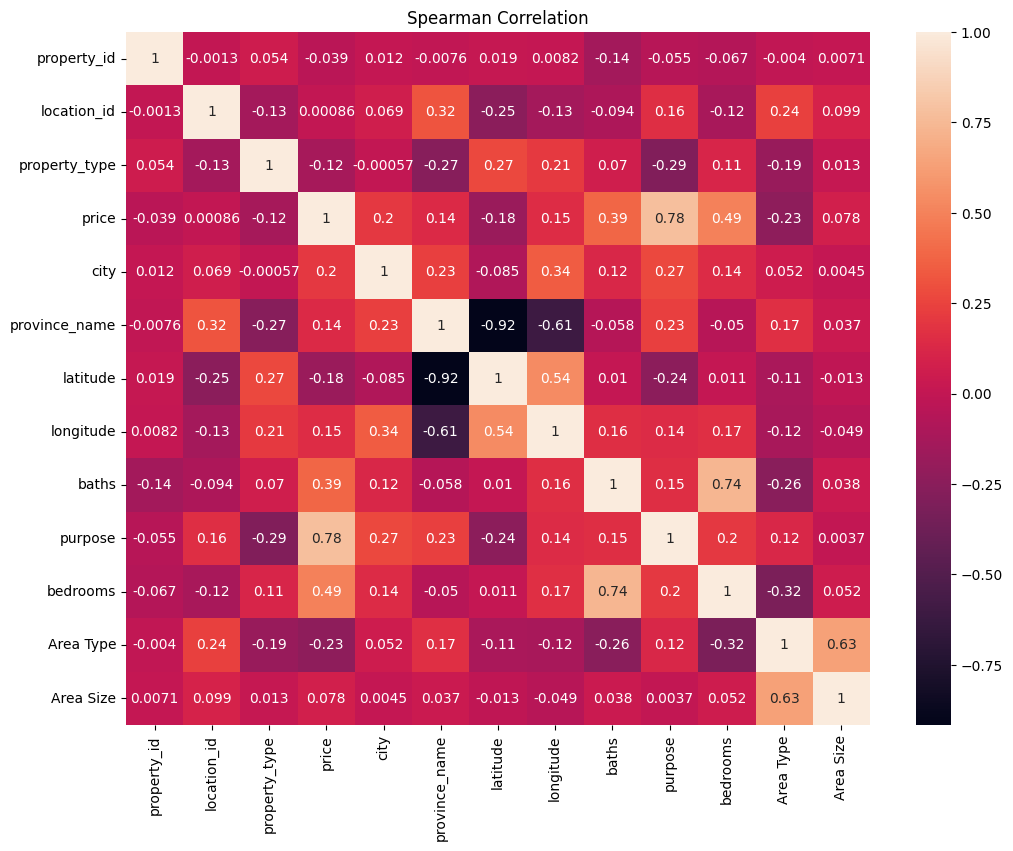

In [ ]:
df.corrwith(df['price']).sort_values(ascending = False)
corr_df = df.corr(method = 'spearman')
plt.figure(figsize=(12, 9))
sns.heatmap(corr_df, annot = True, xticklabels = corr_df.columns, yticklabels = corr_df.columns)
plt.title('Spearman Correlation')
plt.show()

Display the correlation variables with price and sort it descending.

In [ ]:
sorted_correlation = corr_df['price'].sort_values(ascending=False)
print(sorted_correlation)

price            1.000000
purpose          0.780024
bedrooms         0.492805
baths            0.385428
city             0.203042
longitude        0.151112
province_name    0.138488
Area Size        0.078051
location_id      0.000859
property_id     -0.038656
property_type   -0.124390
latitude        -0.182006
Area Type       -0.228955
Name: price, dtype: float64


Filter the correlation value that has more than 0.1.

In [ ]:
filtered_correlation = sorted_correlation[sorted_correlation > 0.1]
print(filtered_correlation)

price            1.000000
purpose          0.780024
bedrooms         0.492805
baths            0.385428
city             0.203042
longitude        0.151112
province_name    0.138488
Name: price, dtype: float64


Create new dataframe that only contain variables with correlation value above 0.1

In [ ]:
df_cleaned = df.drop(['property_id', 'location_id', 'property_type', 'latitude', 'longitude', 'Area Type', 'Area Size', 'Area Category', 'agency', 'agent', 'date_added', 'page_url'], axis = 1)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   price          168446 non-null  int64 
 1   location       168446 non-null  object
 2   city           168446 non-null  int64 
 3   province_name  168446 non-null  int64 
 4   baths          168446 non-null  int64 
 5   area           168446 non-null  object
 6   purpose        168446 non-null  int64 
 7   bedrooms       168446 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 10.3+ MB


# AutoML Initialization

AutoML that we going to use is **H2O AutoML**. Before we split data and training models, we have to initialization the H2O AutoML. That will allow us to proceed to load our data into H2O data frames, train machine learning models, and take advantage of the distributed computing capabilities provided by H2O.

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpadht6b5i
  JVM stdout: /tmp/tmpadht6b5i/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpadht6b5i/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_unknownUser_qbt3j0
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Proceed the loaded data into h2o frame.

In [ ]:
h2o_df = h2o.H2OFrame(df_cleaned)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Split Data Into Train and Test

Split data into train and test set using `.split_frame` by H2O with ration 0.8 for train and 0.2 for test set.

In [ ]:
train, test = h2o_df.split_frame(ratios=[0.8], seed = 1)

# Training Model

We will train our model with these parameters:


*   `max_models` = specify the maximum number of models to build in the AutoML run.
*   `balance_classes` = balance the class distribution.
*   `max_runtime_secs`=specifies the maximum runtime in seconds for the entire grid.
*   `stopping_metric` = specifies the metric to consider when early stopping is specified.

In [ ]:
aml = H2OAutoML(max_models =10,
                balance_classes=True,
		            seed =1,
                max_runtime_secs = 3600,
                stopping_metric = 'mae')

In [ ]:
aml.train(training_frame = train, y = 'price')

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230910_234440


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  6/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  1/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 109178085146865.14
RMSE: 10448831.759908145
MAE: 3377687.8759939494
RMSLE: NaN
Mean Residual Deviance: 109178085146865.14
R^2: 0.9192922634703015
Null degrees of freedom: 9988
Residual degrees of freedom: 9982
Null deviance: 1.3512942455226573e+19
Residual deviance: 1.0905798925320358e+18
AIC: 351248.0047364636

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 277872234380226.1
RMSE: 16669500.123885721
MAE: 4114212.3081975603
RMSLE: NaN
Mean Residual Deviance: 277872234380226.1
R^2: 0.7712372724034795
Null degrees of freedom: 134892
Residual degrees of freedom: 134886
Null deviance: 1.6385456438490857e+20
Residual deviance: 3.748301931225184e+19
AIC: 4869121.767868981

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     4.10461e+06  42540.8      4.12301e+06   4.13792e+06   4.1364e+06    4.08827e+06   4.03743e+06
mean_residual_deviance  2.77835e+14  6.85843e+13  2.74276e+14   2.15415e+14   3.24598e+14   3.66611e+14   2.08276e+14
mse                     2.77835e+14  6.85843e+13  2.74276e+14   2.15415e+14   3.24598e+14   3.66611e+14   2.08276e+14
null_deviance           3.27709e+19  3.46146e+18  3.46246e+19   2.94387e+19   3.52391e+19   3.5937e+19    2.86151e+19
r2                      0.773791     0.0340844    0.786286      0.80222       0.750073      0.726639      0.803737
residual_deviance       7.49341e+18  1.83593e+18  7.3997e+18    5.82182e+18   8.80666e+18   9.82335e+18   5.61555e+18
rmse                    1.65668e+07  2.05483e+06  1.65613e+07   1.4677e+07    1.80166e+07   1.91471e+07   1.44318e+07
rmsle                   nan          0            nan           nan           nan           nan           nan

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Display the leaderboard of trained model sort by Mean Average Error (MAE)

In [ ]:
lb = aml.leaderboard
lb_sort = lb.sort(by="mae")

# Print the sorted leaderboard
print(lb_sort)

model_id                                                        rmse          mse          mae      rmsle    mean_residual_deviance
DRF_1_AutoML_1_20230910_234440                           1.71582e+07  2.94404e+14  3.81616e+06    0.57701               2.94404e+14
StackedEnsemble_BestOfFamily_1_AutoML_1_20230910_234440  1.67127e+07  2.79315e+14  4.04596e+06  nan                     2.79315e+14
StackedEnsemble_AllModels_1_AutoML_1_20230910_234440     1.66695e+07  2.77872e+14  4.11421e+06  nan                     2.77872e+14
GBM_4_AutoML_1_20230910_234440                           1.69875e+07  2.88575e+14  4.21941e+06  nan                     2.88575e+14
GBM_1_AutoML_1_20230910_234440                           1.73629e+07  3.01471e+14  4.23861e+06  nan                     3.01471e+14
GBM_3_AutoML_1_20230910_234440                           1.70117e+07  2.89397e+14  4.34178e+06  nan                     2.89397e+14
GBM_2_AutoML_1_20230910_234440                           1.70884e+07  2.9201

# Evaluation

Performance of best model by Mean Average Error (MAE) in train data.

In [ ]:
model_id = "DRF_1_AutoML_1_20230910_234440"
top_model = h2o.get_model(model_id)
print(top_model)

Model Details
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20230910_234440


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    45                 45                          3.81491e+07            20           20           20            14062         18549         16311.1

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 264851615783658.2
RMSE: 16274262.372951292
MAE: 3797259.9345688084
RMSLE: 0.5674072898827192
Mean Residual Deviance: 264851615783658.2

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 294404379946870.2
RMSE: 17158216.106194437
MAE: 3816159.092398895
RMSLE: 0.5770095372402231
Mean Residual Deviance: 294404379946870.2

Cr

Performance best model by Mean Average Error (MAE) on unseen data.

In [ ]:
top_model.model_performance(test)

ModelMetricsRegression: drf
** Reported on test data. **

MSE: 332566524833426.7
RMSE: 18236406.576774567
MAE: 3836929.4640059024
RMSLE: 0.5745728652342309
Mean Residual Deviance: 332566524833426.7

Performance of best model overall in train data.

In [ ]:
best_model_overall = aml.get_best_model()
print(best_model_overall)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230910_234440


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  6/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  1/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 109178085146865.14
RMSE: 10448831.759908145
MAE: 3377687.8759939494
RMSLE: NaN
Mean Residual Deviance: 109178085146865.14
R^2: 0.9192922634703015
Null degrees of freedom: 9988
Residual degrees of f

Performance best model overall in unseen data.

In [ ]:
best_model_overall.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 293852328305698.44
RMSE: 17142121.46455912
MAE: 4084054.420989872
RMSLE: NaN
Mean Residual Deviance: 293852328305698.44
R^2: 0.7864250503272141
Null degrees of freedom: 33552
Residual degrees of freedom: 33546
Null deviance: 4.616616479375131e+19
Residual deviance: 9.8596271716411e+18
AIC: 1213023.2352538554

# Conclusion

To predict the house price, we load the dataset that consists of 168446 rows and 20 columns. There are missing values on several variables and no duplicated rows in the data so no action is required.The variables type that contain missing values is categorical. In order that, we create new unique value that called "Other" to fill the missing value.

In the exploratory data analysis phase, we discover that most of the price variables are not close to the normal distribution. So, we use Spearman correlation since it is more suitable to determine the relationship between variables that are not normally distributed.

For feature engineering, we drop insignificant column such as property_id, and perform categorical variable encoding to convert them to numerical variables.

To split data and train model we use `H2O AutoML`. From train model, we take 2 model that is, **top_model** as model that has highest performance based on Mean Average Error (MAE) and **best_model_overall** as model that has highest performance overall models.

**top_model** MAE has *3836929.4640059024* which indicate that MAE of this model is relative high. So, this model suggesting that it's less accurate in predicting house prices.

# Further Works

For further works, we are going to perform Hyperparameter Tuning to optimize the hyperparameters of our chosen model to find the best combination for our data. If that not work we will change our h2o AutoML into Google Cloud AutoML

# Saving Model

saving top model based on MAE.

In [ ]:
model_path = "/content/drive/MyDrive/Data Analyst Science/House Price dataset/model"
top_model.download_mojo(path = model_path)
print("Model saved at: ",model_path)

Model saved at:  /content/drive/MyDrive/Data Analyst Science/House Price dataset/model


saving best model overall.

In [ ]:
best_model_overall.download_mojo(path = model_path)
print("Model saved at: ",model_path)

Model saved at:  /content/drive/MyDrive/Data Analyst Science/House Price dataset/model
